<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-f23/blob/main/3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dateien ablegen, um sie in Sitzungsspeicher hochzuladen
Laufwerk
83.52 GB verfügbar
Datensatz vorbereiten - Dummies, Skalen
Im ersten Schritt wird der Datensatz aus dem ersten Notebook unter dem Namen 'maindf' geladen. Hier muss der Datensatz "1_Cleansing_Join" aus dem vorherigen Notebook reingeladen werden.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
maindf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2_Data_for_Modeltraining.csv")
#maindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & ML/Projekt/1_Cleansing_Join_final.csv')

Mounted at /content/drive




> Durch Ausgabe des Dataframes maindf können wir unseren aktuellen, über Google Drive in colab geladenen Datensatz einsehen.


In [ ]:
maindf

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stay_nights_sum,adults,children,babies,is_repeated_guest,...,country_CN,country_DEU,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA
0,0,342,2015,7,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,737,2015,7,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,7,2015,7,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,13,2015,7,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,14,2015,7,1,2,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90909,0,21,2017,8,30,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90910,0,23,2017,8,30,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90911,0,34,2017,8,31,7,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
90912,0,109,2017,8,31,7,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# **Vorbereitung des Datensatzes auf die Regression**



> Wir möchten durch eine Regression die 'average daily rate', also wie teuer ein Zimmer pro Nacht im Schnitt ist, vorhersagen. Dafür müssen wir zuerst aus den Daten die Spalte 'adr' entfernen bzw. diese seperat als y-Variable speichern, da es sich dabei um unsere target-Variable handelt. Durch den Train-Test-Split können wir später das Modell anhand der Trainingsdaten passend auf unsere X- und y-Daten trainieren und über den Abgleich der auf den X-test-Daten vorhergesagten y-Werten zu den tatsächlichen y-test-Daten die Präzision des Modells bestimmen.



> Mit dem Befehl `drop(columns='adr')` entfernen wir die adr-Spalte aus den X-Daten. Wir speichern sie dafür mit `y = maindf.adr`.





In [ ]:
X = maindf.drop(columns='adr')
y = maindf.adr



> Anschließend können wir die Daten mit der Funktion `train_test_split()`, die wir erst importieren müssen, in Trainings- und Testdaten aufteilen. Wir wählen hierfür eine Testgröße von 20% und den Random-State 42.



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



> Mit diesem Split trainieren wir verschiedene Modelle und prüfen über die Accuracy und den f1-Score, welches Modell für unsere Daten die beste Performance bietet. Wir testen

*   Lineare Regression
*   Support Vector Mechine (LinearSVR)
*   Decision Tree
*   Gradient Boosting
*   XGBoost
*   Neuronale Netze




> Außerdem benötigen wir einige Module bzw. Funktionen für alle Modelle, die wir einmal gebündelt zu Beginn importieren:



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt


> Um unsere Ergebnisse vergleichen zu können, definieren wir nun noch eine `evaluate`-Function, die das Bestimmtheitsmaß (R2), den mittleren absoluten Fehler (MAE), den mittleren quadrierten Fehler (MSE), die Quadratwurzel des mittleren quadratischen Fehlers (RMSE) und den Mittlerer absoluter prozentualer Fehler (MAPE):




In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
  pred = reg.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))



> Für die Bewertung der Modelle betrachten wir insbesondere das Bestimmtheitsmaß und den mittleren absoluten Fehler.



## **Lineare Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [ ]:
linear_scaled = make_pipeline(StandardScaler(),
                              linear)

In [ ]:
linear_scaled.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
evaluate_lin_reg(linear_scaled, X_test, y_test)

NameError: ignored

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
n_alphas = 200
alphaValues = np.logspace(-10, -1, n_alphas)

linear_ridge = make_pipeline(StandardScaler(),
                             RidgeCV(alphas=alphaValues))

In [ ]:
linear_ridge.fit(X_train, y_train)

In [ ]:
linear_ridge[1].alpha_

In [ ]:
evaluate_lin_reg(linear_ridge, X_test,y_test)

In [ ]:
maindf.adr.mean()

## **SVM**



> Als nächstes trainieren und evaluieren wir mithilfe des Support Vector Machine Regressors. Da wir große Datenmengen in das Modell geben, reicht die Standard-Implementierung nicht aus, wir benötigen `LinearSVR` von `sklearn`.




In [ ]:
from sklearn.svm import LinearSVR



> Wir bilden eine Pipeline, in der zuerst die Daten skaliert und dann direkt in das LinearSVR-Modell gegeben werden. Für das Modell verwenden wir wieder den random_state 42 und tol=1e-5. tol bezeichnet dabei den Toleranzwert, unter den der LinearSVR trainiert werden soll. Das Training wird beendet, wenn die Vorhersagen weniger oder gleich dem Toleranzwert von den tatsächlichen Zielwerten abweichen.
Ein niedriger Toleranzwert führt zwar zu einer hohen Genauigkeit, verlangsamt dafür aber das Training.

In [ ]:
lsvr = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=42, tol=1e-5))



> Das Modell kann dann auf die Trainingsdaten trainiert werden.



In [ ]:
lsvr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=42, tol=1e-05))])


> Nach Beenden des Trainings evaluieren wir den LinearSVR anhand der Testdaten.




In [ ]:
evaluate(lsvr, X_test, y_test)

R2: 0.39195938175867595
MAE: 26.760446916694537
MSE: 1472.649461870278
RMSE: 38.37511513820223
MAPE: 5481775411882708.0




> Mit einem Bestimmtheitsmaß von rund 39% ist das Modell nicht sehr stark. Wir versuchen deshalb noch weitere Modelle.



## **Regression Entscheidungsbaum**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(random_state=42)

In [ ]:
X = maindf_c.drop(columns='adr')
y = maindf_c.adr

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle = True)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def evaluate(reg, X_test, y_test):

  pred = reg.predict(X_test)

  print('R2:', r2_score(y_test, pred))

  print('MAE:', mean_absolute_error(y_test, pred))

  print('MSE:', mean_squared_error(y_test, pred))

  print('RMSE:', mean_squared_error(y_test, pred, squared=False))

  print('MAPE:', mean_absolute_percentage_error(y_test, pred))

In [ ]:
evaluate(tree, X_test, y_test)

R2: 0.37982164771914984
MAE: 17.025995515075234
MSE: 2389.4400645665987
RMSE: 48.88189915057105
MAPE: 3167323821968065.5


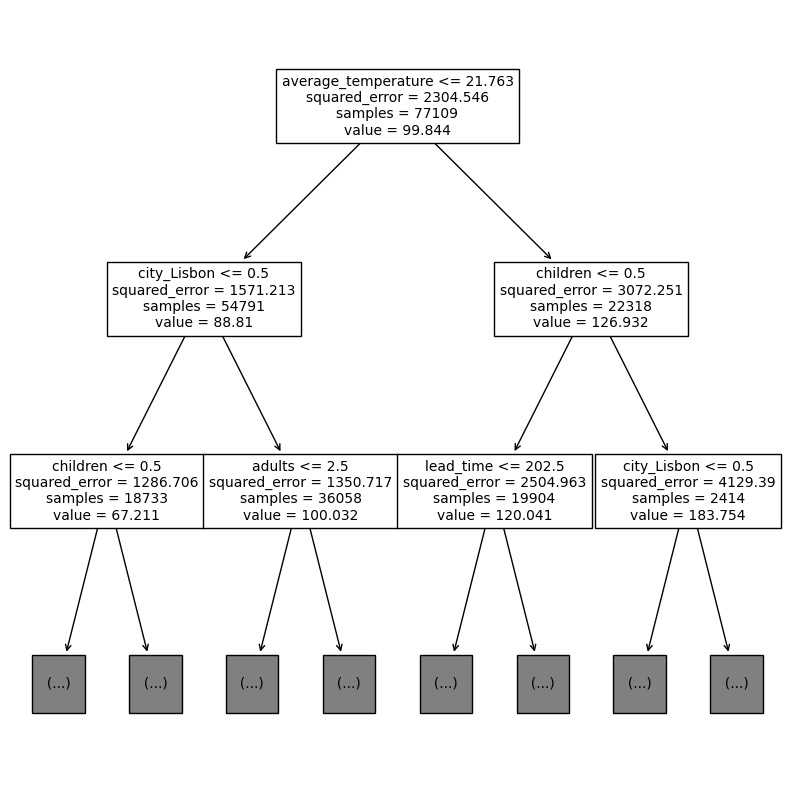

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sktree.plot_tree(tree, max_depth=2, fontsize=10, feature_names=X.columns);

In [ ]:
predictions = tree.predict(X_test)
maindf_with_predictions = pd.concat([X_test, y_test], axis='columns')
maindf_with_predictions = pd.concat([maindf_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=maindf_with_predictions.index)], axis=1)

In [ ]:
maindf_with_predictions = maindf_with_predictions.sort_values(by='stay_nights_sum')

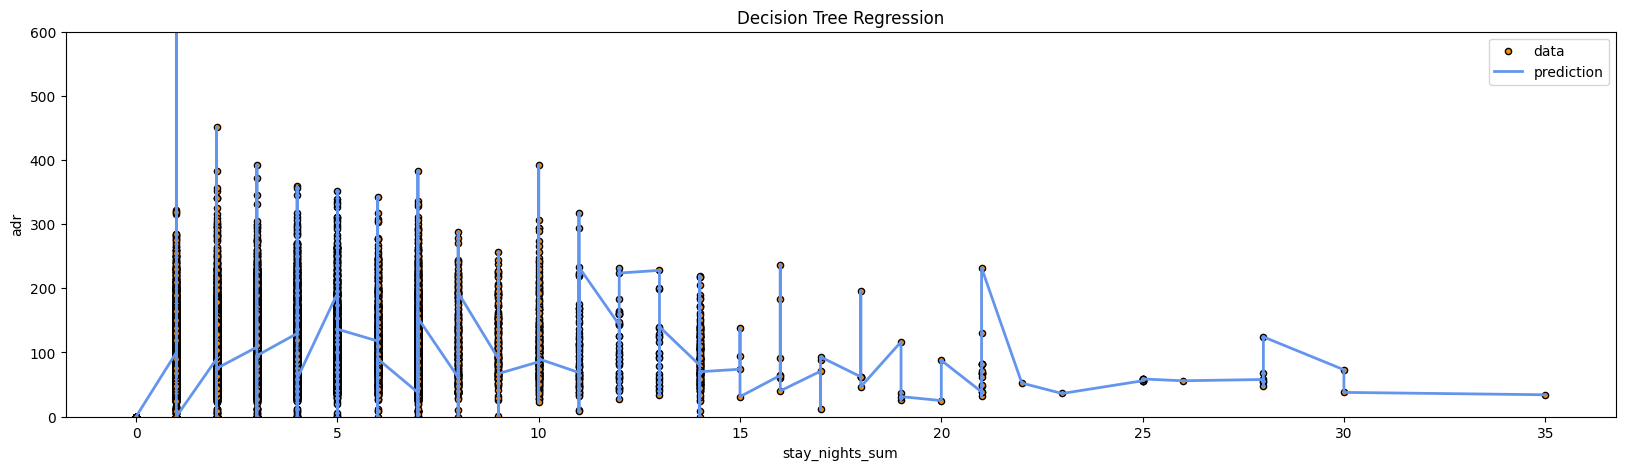

In [ ]:
ax = maindf_with_predictions.plot(x='stay_nights_sum', y='adr', kind='scatter', s=20, edgecolor='black',
            c='darkorange', label='data', figsize=(20,5), ylim=([0, 600]))

maindf_with_predictions.plot(x='stay_nights_sum', y='adr', kind='line', color='cornflowerblue',
         label='prediction', linewidth=2, ax=ax)

ax.set_xlabel('stay_nights_sum')
ax.set_ylabel('adr')
ax.set_title('Decision Tree Regression')
ax.legend()

### **Hyperparametertuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Definiere den Entscheidungsbaumregressor
tree = DecisionTreeRegressor()

In [ ]:
# Definiere das Gitter der Hyperparameter
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Führe die Grid-Suche durch
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Finde die besten Hyperparameter
best_params = grid_search.best_params_
print("Beste Hyperparameter:", best_params)

Beste Hyperparameter: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# Trainiere den Entscheidungsbaumregressor mit den besten Hyperparametern
best_tree = DecisionTreeRegressor(**best_params)
best_tree.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10)

In [ ]:
# Evaluieren auf den Testdaten
y_pred = best_tree.predict(X_test)

In [ ]:
evaluate(best_tree, X_test, y_test)

R2: 0.4338490703405641
MAE: 16.323869710808506
MSE: 2181.28173765612
RMSE: 46.70419400499403
MAPE: 3413291054157661.5


## **Gradient Boosting**



> Nach Training und Evaluation des Decision Trees versuchen wir wieder die Ensemble-Implementierung Gradient Boosting, die aus vielen schwächeren Decision Trees ein stärkeres Modell entwickelt. Dafür benötigen wir den `GradientBoostingRegressor` von `sklearn`.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor



> Wir erstellen die Pipeline aus Scaler und Regressor. Danach trainieren wir das Modell.



In [ ]:
gb = make_pipeline(StandardScaler(),
                   GradientBoostingRegressor(random_state=42))

In [ ]:
gb.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])



> Die Evaluation zeigt, dass GradientBoosting mit einem Bestimmtheitsmaß von 0,64 deutlich besser performt, als die vorherigen Modelle. Der mittlere absolute Fehler liegt bei 20,86, was bedeutet, dass im Schnitt das Modell die adr um rund 21€ falsch vorhersagt. Wir versuchen, durch Hyperparameter Tuning die Ergebnisse
 noch zu verbessern.



In [ ]:
evaluate(gb, X_test, y_test)

R2: 0.6419541401266158
MAE: 20.865622348836478
MSE: 867.1724010683622
RMSE: 29.44779110677679
MAPE: 3956896952791488.0


In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
dummy = DummyRegressor()

In [ ]:
dummy.fit(X_train, y_train)

DummyRegressor()

In [ ]:
evaluate(dummy, X_test, y_test)

R2: -0.00044985553542464807
MAE: 36.81005815193502
MSE: 2423.0485549531177
RMSE: 49.22447109876467
MAPE: 5951914184838511.0


### **Hyperparameter Tuning**



> Für das Hyperparameter Tuning erstellen wir ein Grid, das die notwendigen Hyperparameter definiert, die im Tuning getestet werden sollen, um daraus die Hyperparameter zu ermitteln, die die besten Ergebnisse erzielen.



In [ ]:
param_grid = {
    'gradientboostingregressor__loss': ['ls', 'lad', 'huber', 'quantile'],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'gradientboostingregressor__n_estimators': [100, 500, 1000],
    'gradientboostingregressor__max_depth': [3, 5, 7, 9],
    'gradientboostingregressor__min_samples_split': [2, 4, 6],
    'gradientboostingregressor__min_samples_leaf': [1, 2, 3],
    'gradientboostingregressor__subsample': [0.8, 1.0],
    'gradientboostingregressor__max_features': ['auto', 'sqrt', 'log2'],
    'gradientboostingregressor__random_state': [42],
    'standardscaler': [StandardScaler(), None],
}



> Wir nutzen nun wieder die RandomizedSearch in Kombination mit cross-validation. Wir übergeben das Modell, das Grid, die Anzahl an Iterationen, die Angabe `n_jobs=-1`, um alle verfügbaren Prozessoren für diese Aufgabe zu nutzen und so eine möglichst niedrige Berechnungszeit zu erreichen, den random_state 42, die Bestimmung der cross-validation auf 5 Folds sowie die Ausgaben (verbose=1) während des Suchprozesses.

In [ ]:
# setting n_jobs=-1 will ensure that sklearn uses all available cpu cores
# takes a loooong time (reduce n_iter to make it faster)
optimized_gb = RandomizedSearchCV(gb, param_grid, n_iter=100, n_jobs=-1, random_state=42, cv=5, verbose=1)
optimized_gb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits




> Nach dem Tuning geben wir nun die bestmögliche Kombination an Hyperparametern aus, die wir durch Hyperparameter Tuning finden konnten und Evaluieren das optimierte Modell.



In [ ]:
optimized_gb.best_params_

In [ ]:
evaluate(optimized_gb, X_test, y_test)

## **XGB Regression**



> Als nächstes testen wir noch die XGB Regression, da diese bei der Classification ein vielversprechendes Modell war. Dafür importieren wir den `XGBRegressor` von `xgboost`, bilden die Pipeline und trainieren das Modell auf die Trainingsdaten. Im Anschluss evaluieren wird wieder anhand der Testdaten.


In [ ]:
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_tree

xgb = make_pipeline(StandardScaler(),
                    XGBRegressor())
xgb.fit(X_train, y_train)

In [ ]:
evaluate(xgb, X_test, y_test)

In [ ]:
#feature_importance = gb.feature_importances_

# get indices sorted by importance
#sorted_idx = np.argsort(feature_importance)

# generate range from 0 to the number of features
#pos = np.arange(sorted_idx.shape[0])

# 'pos' acts as our value for the 'y' axis
#plt.barh(pos, feature_importance[sorted_idx], align='center')

#plt.yticks(pos, np.array(X.columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
#plt.show()

### **Hyperparameter Tuning**



> Um das Modell, das bisher am besten performt nochmals zu verbessern, führen wir auch hier Hyperparameter Tuning durch. Dafür definieren wir wieder das Grid mit den notwendigen Parametern und übergeben es mit dem Modell, cross-validation, Iterations-Anzahl etc. in die RandomizedSearchCV.



In [ ]:
regressor=XGBRegressor()

grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'min_child_weight':[1,2,3,4],
    'booster':['gbtree','gblinear'],
    'base_score':[0.25,0.5,0.75,1]
    }

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error', n_jobs = -1,
            verbose = 1,
            return_train_score = True,
            random_state=42)



> Wir trainieren das Hyperparameter-Tuning-Modell auf die Trainingsdaten und geben uns die besten estimators aus.



In [ ]:
optimized_xgb = random_cv.fit(X_train,y_train)
optimized_xgb_est = random_cv.best_estimator_



> Auch die Kombination der besten Parameter ist für uns interessant und wir lassen sie auflisten:



In [ ]:
optimized_xgb.best_params_



> Das Ergebnis mit einem Bestimmtheitsmaß von 79% und einem MAE von 12,14€ ist ziemlich gut.



In [ ]:
evaluate(optimized_xgb, X_train, y_train)
evaluate(optimized_xgb, X_test, y_test)

### **Plotting**

test_score[i] = best_xgb.loss_(y_test, y_pred) hat nicht funktioniert: loss_ nicht in Pipeline => MSE anders berechnen

In [ ]:
# get best xgb model (after hyperparam tuning)
best_xgb = optimized_xgb.best_estimator_
# staged_predict returns the error after each stage in the model
predictions = best_xgb.predict(X_test)
# how many estimators were used for the model
n_estimators = optimized_xgb.best_params_['xgbregressor__n_estimators']

# calculate deviance (error) for all examples in test set
test_score = np.zeros((n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(predictions):
   mse = mean_squared_error(y_test, predictions)

In [ ]:
train_predictions = xgb.predict(X_train)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(n_estimators) + 1, train_mse = mean_squared_error(y_train, train_predictions), 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

### **Error Analysis**

In [ ]:
predictions = optimized_xgb.predict(X_test)
maindf_with_predictions = pd.concat([X_test, y_test], axis='columns')
maindf_with_predictions = pd.concat([maindf_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=maindf_with_predictions.index)], axis=1)

Then, we calculate the difference between the prediction and actual value (MAE):

In [ ]:
maindf_with_predictions['pred_diff'] = np.abs(maindf_with_predictions['adr'] - maindf_with_predictions.Prediction)

In [ ]:
maindf_with_predictions.pred_diff.plot(kind='hist')

In [ ]:
for column in X_test.columns:
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell
  maindf_with_predictions.plot(kind='hist', y=column, title=f'{column} (All)', ax=ax1)
  maindf_with_predictions[maindf_with_predictions.pred_diff > 2].plot(kind='hist', y=column, title=f'{column} (Large error)', ax=ax2)

## **cnn**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
  pred = reg.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))

In [ ]:
X = maindf_c.drop(columns='adr')
y = maindf_c.adr

In [ ]:
X_scaled = maindf_scaled.drop(columns='adr')
y_scaled = maindf_scaled.is_canceled

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle = True)

In [ ]:
import tensorflow as tf
from tensorflow import keras

def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

In [ ]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [in €]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([min(history.history['val_mae']),max(history.history['val_mae'])])
  plt.xlim([0,20])

def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.xlim([-10, 100])
  plt.ylim([-30, 30])
  _ = plt.plot([-10, 10],[-10,10])

In [ ]:
EPOCHS = 20

history_scaled = model.fit(X_train_scaled, y_train_scaled, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
evaluate(model, X_test_scaled, y_test_scaled)

In [ ]:
plot_history(history_scaled)

In [ ]:
# nicht skalierte Daten

In [ ]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [in €]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([20,max(history.history['val_mae'])])
  plt.xlim([0,50])

In [ ]:
EPOCHS = 50

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
plot_history(history)

> Aus der Grafik können wir erkennen, dass der Mean Absolute Error bei ~24€ liegt.

In [ ]:
def build_conv1D_model():

  n_timesteps = X_train.shape[1]
  n_features  = 1
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

In [ ]:
[loss, mae] = model_conv1D.evaluate(X_test, y_test, verbose=0)
print(f'Mean Abs Error (test data): {mae}')

In [ ]:
test_predictions = model_conv1D.predict(X_test).flatten()
plot_prediction(y_test, test_predictions)

### **Optimizer: SGD**

In [ ]:
from keras.optimizers import SGD

def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = SGD(lr=0.01, momentum=0.9)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

In [ ]:
EPOCHS = 50

history_sdg = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

### **Optimizer: Adam**

In [ ]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [in €]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([min(history.history['val_mae'])-2,max(history.history['val_mae'])+2])
  plt.xlim([0,50])

In [ ]:
from keras.optimizers import Adam

def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = Adam()

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

In [ ]:
EPOCHS = 50

history_adam = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
evaluate(model, X_test, y_test)

In [ ]:
plot_history(history_adam)

In [ ]:
def build_conv1D_model():

  n_timesteps = X_train.shape[1]
  n_features  = 1
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = Adam()

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

In [ ]:
[loss, mae] = model_conv1D.evaluate(X_test, y_test, verbose=0)
print(f'Mean Abs Error (test data): {mae}')

In [ ]:
test_predictions = model_conv1D.predict(X_test).flatten()
plot_prediction(y_test, test_predictions)